# Periodic Table

In [99]:
import pandas as pd
from mendeleev import element
import numpy as np

In [100]:
# List to store the data
data_list = []

In [101]:
# Loop over all 118 elements and gather data
for i in range(1, 119):
    el = element(i)
    data = {
        "Atomic Number": el.atomic_number,
        "Name": el.name,
        "Symbol": el.symbol,
        "El. Configuration": list(str(el.ec).split()),
        "Atomic Mass (u)": el.atomic_weight,
        "Atomic Radius (pm)": el.atomic_radius,
        "Covalent Radius Pyykko (pm)": el.covalent_radius_pyykko if el.covalent_radius_pyykko else np.nan,
        "Electronegativity (Ghosh)": el.en_ghosh if el.en_ghosh else np.nan,
        "Electronegativity (Pauling)": el.en_pauling if el.en_pauling else np.nan
    }
    data_list.append(data)

In [102]:
# Create a DataFrame
df = pd.DataFrame(data_list)

In [103]:
df

,Atomic Number,Name,Symbol,El. Configuration,Atomic Mass (u),Atomic Radius (pm),Covalent Radius Pyykko (pm),Electronegativity (Ghosh),Electronegativity (Pauling)
0,1,Hydrogen,H,[1s1],1.008000,25.0,32.0,0.263800,2.20
1,2,Helium,He,[1s2],4.002602,120.0,46.0,0.442712,NaN
2,3,Lithium,Li,"[1s2, 2s1]",6.940000,145.0,133.0,0.105093,0.98
3,4,Beryllium,Be,"[1s2, 2s2]",9.012183,105.0,102.0,0.144986,1.57
4,5,Boron,B,"[1s2, 2s2, 2p1]",10.810000,85.0,85.0,0.184886,2.04
...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",289.000000,NaN,143.0,NaN,NaN
114,115,Moscovium,Mc,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",288.000000,NaN,162.0,NaN,NaN
115,116,Livermorium,Lv,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",293.000000,NaN,175.0,NaN,NaN
116,117,Tennessine,Ts,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",294.000000,NaN,165.0,NaN,NaN


c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Axes: xlabel='Atomic Number', ylabel='Atomic Radius (pm)'>

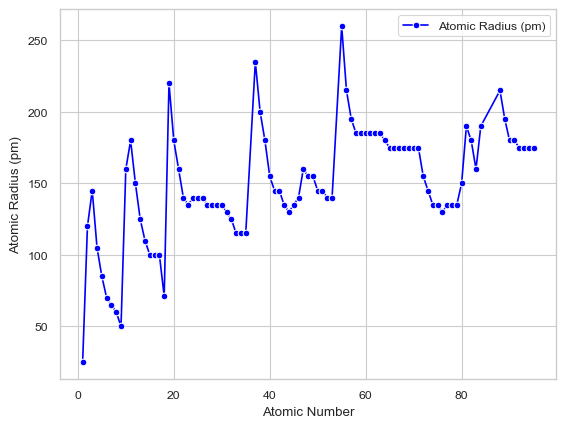

In [104]:
# Plot the atomic radius
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')

sns.lineplot(x='Atomic Number', y='Atomic Radius (pm)', data=df, marker="o", color='blue', label='Atomic Radius (pm)')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Atomic Number                118 non-null    int64  
 1   Name                         118 non-null    object 
 2   Symbol                       118 non-null    object 
 3   El. Configuration            118 non-null    object 
 4   Atomic Mass (u)              118 non-null    float64
 5   Atomic Radius (pm)           90 non-null     float64
 6   Covalent Radius Pyykko (pm)  118 non-null    float64
 7   Electronegativity (Ghosh)    103 non-null    float64
 8   Electronegativity (Pauling)  85 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 8.4+ KB


In [106]:
df.describe()

,Atomic Number,Atomic Mass (u),Atomic Radius (pm),Covalent Radius Pyykko (pm),Electronegativity (Ghosh),Electronegativity (Pauling)
count,118.000000,118.000000,90.000000,118.000000,103.000000,85.000000
mean,59.500000,146.469608,149.844444,141.898305,0.186313,1.748588
std,34.207699,89.643663,40.079110,33.689226,0.061255,0.634442
min,1.000000,1.008000,25.000000,32.000000,0.087310,0.700000
25%,30.250000,66.465750,135.000000,122.250000,0.141744,1.240000
50%,59.500000,142.574830,145.000000,142.000000,0.178503,1.700000
75%,88.750000,226.750000,178.750000,166.750000,0.224404,2.160000
max,118.000000,294.000000,260.000000,232.000000,0.442712,3.980000


Missing data is hard to see whn using the dataframe, lets plot it:

In [107]:
df.isna().sum()

Atomic Number                   0
Name                            0
Symbol                          0
El. Configuration               0
Atomic Mass (u)                 0
Atomic Radius (pm)             28
Covalent Radius Pyykko (pm)     0
Electronegativity (Ghosh)      15
Electronegativity (Pauling)    33
dtype: int64

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

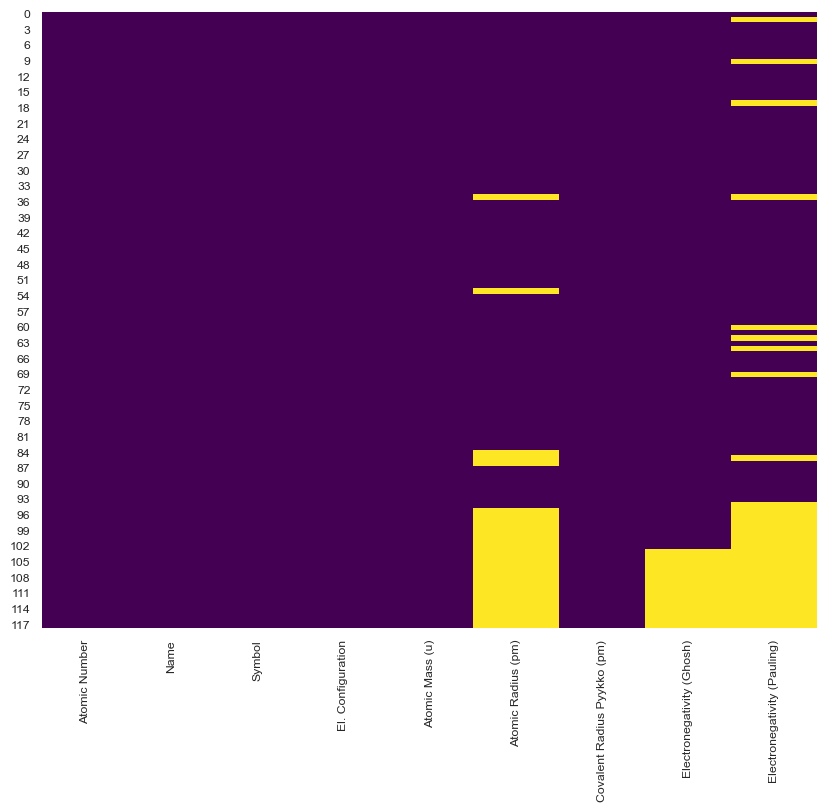

In [109]:
# Plot the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")

## Get rid of NaN values

In [110]:
df2 = df.dropna()

<Axes: >

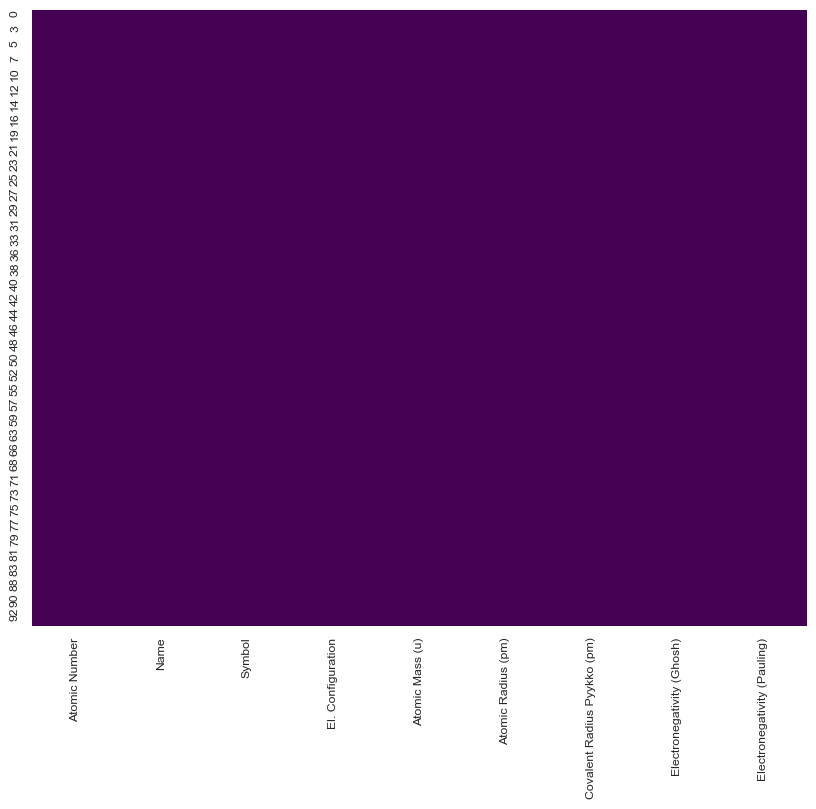

In [111]:
# Plot the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df2.isna(), cbar=False, cmap="viridis")

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 93
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Atomic Number                82 non-null     int64  
 1   Name                         82 non-null     object 
 2   Symbol                       82 non-null     object 
 3   El. Configuration            82 non-null     object 
 4   Atomic Mass (u)              82 non-null     float64
 5   Atomic Radius (pm)           82 non-null     float64
 6   Covalent Radius Pyykko (pm)  82 non-null     float64
 7   Electronegativity (Ghosh)    82 non-null     float64
 8   Electronegativity (Pauling)  82 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 6.4+ KB


## Correlation test

In [113]:
# Only numerical values can be analyzed for correlation
df2.columns

Index(['Atomic Number', 'Name', 'Symbol', 'El. Configuration',
       'Atomic Mass (u)', 'Atomic Radius (pm)', 'Covalent Radius Pyykko (pm)',
       'Electronegativity (Ghosh)', 'Electronegativity (Pauling)'],
      dtype='object')

In [114]:
df_corr = df[
    [
        "Atomic Number",
        "Atomic Mass (u)",
        "Atomic Radius (pm)",
        "Covalent Radius Pyykko (pm)",
        "Electronegativity (Ghosh)",
        "Electronegativity (Pauling)",
    ]
]

In [115]:
pearson_corr = df_corr.corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

Pearson Correlation:
                              Atomic Number  Atomic Mass (u)  \
Atomic Number                     1.000000         0.999247   
Atomic Mass (u)                   0.999247         1.000000   
Atomic Radius (pm)                0.570481         0.558657   
Covalent Radius Pyykko (pm)       0.527773         0.519874   
Electronegativity (Ghosh)        -0.055676        -0.044387   
Electronegativity (Pauling)      -0.288639        -0.286993   

                             Atomic Radius (pm)  Covalent Radius Pyykko (pm)  \
Atomic Number                          0.570481                     0.527773   
Atomic Mass (u)                        0.558657                     0.519874   
Atomic Radius (pm)                     1.000000                     0.917168   
Covalent Radius Pyykko (pm)            0.917168                     1.000000   
Electronegativity (Ghosh)             -0.499090                    -0.552195   
Electronegativity (Pauling)           -0.806280         

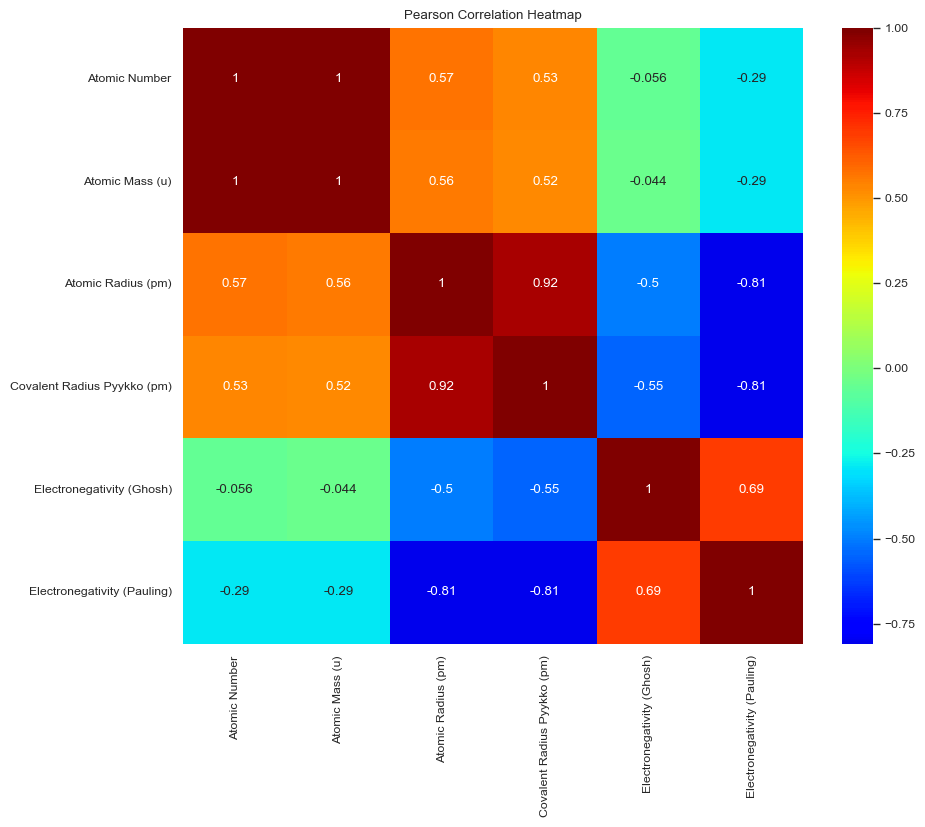

In [116]:
# Heatmap of Pearson Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='jet', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Predicting atomic radius from our dataset

1. Predict atomic radius using only "Atomic Number" as a feature and "Atomic Radius (pm)" as a target/response.

# First try: Liean Regression

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [118]:
# Selet features
X = df2['Atomic Number']

In [119]:
X = X.values.reshape(-1, 1)

In [120]:
# Select the target
y = df2['Atomic Radius (pm)']

# No need to split the data

In [121]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()

In [122]:
linear_model.fit(X, y)

LinearRegression()

In [123]:
# # Predictions on the test set
y_pred_test_linear = linear_model.predict(X)

In [124]:
# Evaluation Metrics for the test set
rmse_test_linear = np.sqrt(mean_squared_error(y, y_pred_test_linear))
r2_test_linear = r2_score(y, y_pred_test_linear)

print(f"Root Mean Squared Error (RMSE) for Test Set: {rmse_test_linear:.2f} pm")
print(f"Coefficient of Determination (R^2) for Test Set: {r2_test_linear:.2f}")

Root Mean Squared Error (RMSE) for Test Set: 33.19 pm
Coefficient of Determination (R^2) for Test Set: 0.31


In [125]:
# generate a table showing the atomic numbers, true values, and predicted values
df_linear = pd.DataFrame({'Atomic Number': X.flatten(), 'True Values': y, 'Predicted Values': y_pred_test_linear})
df_linear

,Atomic Number,True Values,Predicted Values
0,1,25.0,111.150483
2,3,145.0,112.819282
3,4,105.0,113.653682
4,5,85.0,114.488081
5,6,70.0,115.322481
...,...,...,...
89,90,180.0,185.412035
90,91,180.0,186.246434
91,92,175.0,187.080834
92,93,175.0,187.915233


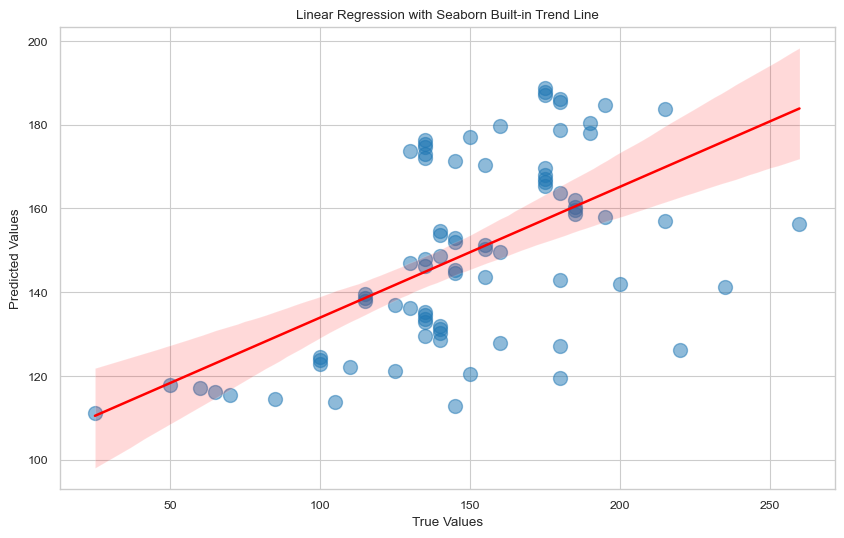

In [126]:
# Generate the scatter plot with a linear trend line using only Seaborn's built-in 'lmplot'
# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='True Values', y='Predicted Values', data=df_linear, scatter_kws={'s': 100, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Linear Regression with Seaborn Built-in Trend Line')
plt.show()

# Random Forest (RF)

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [128]:
# Prepare feature matrix (X) and target vector (y)
X = df2[['Atomic Number']]
y = df2['Atomic Radius (pm)']

In [129]:
# Explanation of the split works
import random

total = [trains for trains in range(1, 21)]

print(total)

#total2 = random.sample(total, 20)
#print(total2)

#print(total2[:16], total2[16:])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [130]:
# # Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# # Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

In [132]:
# # Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [133]:
# # Make predictions on the testing data
y_pred = rf_model.predict(X_test)

In [134]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics in a formatted manner
print(f"Mean Squared Error     : {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error    : {mae:.4f}")
print(f"R-squared              : {r2:.4f}")

Mean Squared Error     : 1021.2907
Root Mean Squared Error: 31.9576
Mean Absolute Error    : 20.2559
R-squared              : 0.6335


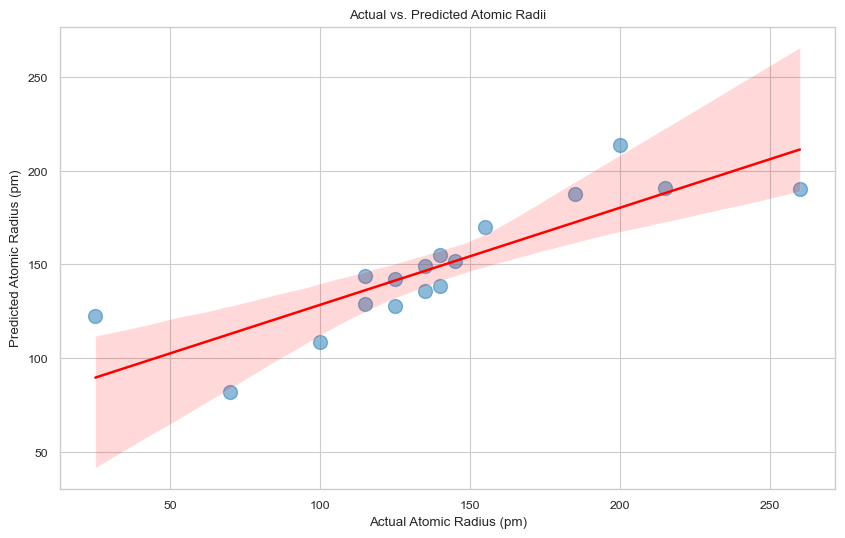

In [135]:
# Create a DataFrame to hold the test labels and predictions
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=plot_data, scatter_kws={'s': 100, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Actual vs. Predicted Atomic Radii')
plt.xlabel('Actual Atomic Radius (pm)')
plt.ylabel('Predicted Atomic Radius (pm)')
plt.show()

# XGBoost

In [136]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [137]:
# Prepare the features and target variable
X = df2[["Atomic Number"]]
y = df2["Atomic Radius (pm)"]

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# # Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror')

In [140]:
# # Train the model
xgb_model.fit(X_train, y_train)

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [141]:
# # Make predictions on the test set
y_pred = xgb_model.predict(X_test)

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [142]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics in a formatted manner
print(f"Mean Squared Error     : {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error    : {mae:.4f}")
print(f"R-squared              : {r2:.4f}")


Mean Squared Error     : 1902.8335
Root Mean Squared Error: 43.6215
Mean Absolute Error    : 22.9413
R-squared              : 0.3172


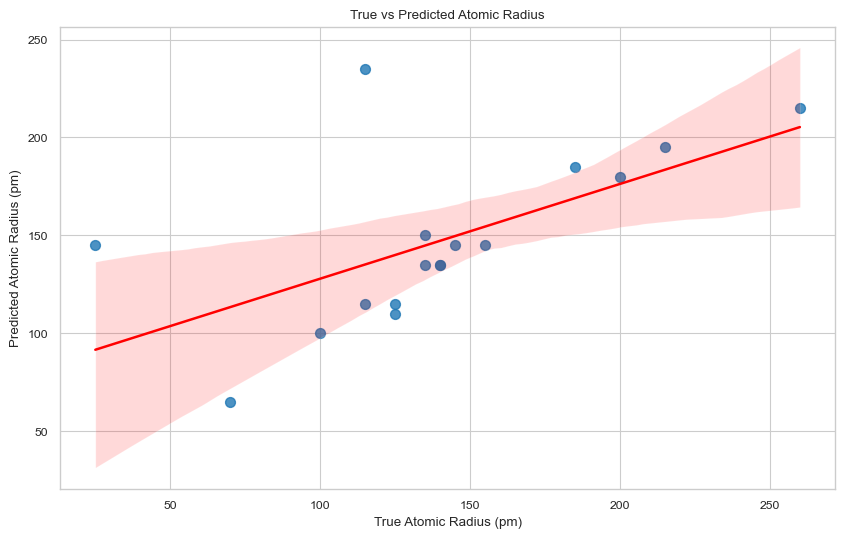

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to hold the true and predicted values
results_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Create the regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='True', y='Predicted', data=results_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('True Atomic Radius (pm)')
plt.ylabel('Predicted Atomic Radius (pm)')
plt.title('True vs Predicted Atomic Radius')
plt.show()

## Save for later, load, resume training

In [144]:
# Save the trained model to a file (JSON format is also supported)
xgb_model.save_model('xgboost_model.json')

In [145]:
# To load a model: initialize an empty XGBoost model
loaded_model = XGBRegressor()

In [146]:
# Load the saved model into the empty model
loaded_model.load_model('xgboost_model.json')

In [147]:
# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [148]:
# You can resume training using the loaded model and additional data.
# This will start training from the iteration where the model was saved.
# Assume `X_train` and `y_train` contain the training features and labels

loaded_model.fit(X_train, y_train, xgb_model=loaded_model.get_booster())

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=['int'],
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Saving the dataframe

In [149]:
df

,Atomic Number,Name,Symbol,El. Configuration,Atomic Mass (u),Atomic Radius (pm),Covalent Radius Pyykko (pm),Electronegativity (Ghosh),Electronegativity (Pauling)
0,1,Hydrogen,H,[1s1],1.008000,25.0,32.0,0.263800,2.20
1,2,Helium,He,[1s2],4.002602,120.0,46.0,0.442712,NaN
2,3,Lithium,Li,"[1s2, 2s1]",6.940000,145.0,133.0,0.105093,0.98
3,4,Beryllium,Be,"[1s2, 2s2]",9.012183,105.0,102.0,0.144986,1.57
4,5,Boron,B,"[1s2, 2s2, 2p1]",10.810000,85.0,85.0,0.184886,2.04
...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",289.000000,NaN,143.0,NaN,NaN
114,115,Moscovium,Mc,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",288.000000,NaN,162.0,NaN,NaN
115,116,Livermorium,Lv,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",293.000000,NaN,175.0,NaN,NaN
116,117,Tennessine,Ts,"[1s2, 2s2, 2p6, 3s2, 3p6, 4s2, 3d10, 4p6, 5s2,...",294.000000,NaN,165.0,NaN,NaN


In [150]:
# df.to_csv('periodic_table.csv', index=False)

In [151]:
df.to_csv('periodic_table.csv', index=False)

---
# Trying to improve the results

## Random Forest with 2 features and 1 target

Let's add one more feature: **Atomic Number** + Electronegativity (Ghosh) = Atomic Radius (pm)

In [152]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
df2.columns

Index(['Atomic Number', 'Name', 'Symbol', 'El. Configuration',
       'Atomic Mass (u)', 'Atomic Radius (pm)', 'Covalent Radius Pyykko (pm)',
       'Electronegativity (Ghosh)', 'Electronegativity (Pauling)'],
      dtype='object')

In [154]:
# # Prepare the features and target variable
X = df2[['Atomic Number', 'Electronegativity (Ghosh)']]
y = df2['Atomic Radius (pm)']

In [155]:
X = df2[['Atomic Number', 'Electronegativity (Ghosh)']]
y = df2['Atomic Radius (pm)']

In [156]:
y

0      25.0
2     145.0
3     105.0
4      85.0
5      70.0
      ...  
89    180.0
90    180.0
91    175.0
92    175.0
93    175.0
Name: Atomic Radius (pm), Length: 82, dtype: float64

In [157]:
# # # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X_test

,Atomic Number,Electronegativity (Ghosh)
33,34,0.224033
0,1,0.263800
25,26,0.139253
34,35,0.241258
21,22,0.123364
31,32,0.189589
12,13,0.150078
58,59,0.172080
5,6,0.224776
14,15,0.206931


In [159]:
# # Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [160]:
# # # Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [161]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 616.6666
Root Mean Squared Error: 24.8328
Mean Absolute Error: 15.9029
R-squared: 0.7787


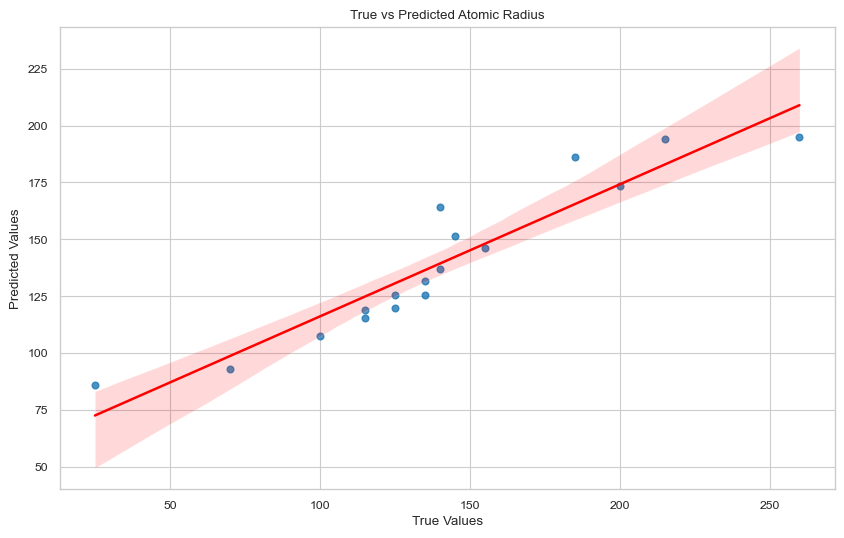

In [162]:
# Plot the predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Atomic Radius')
plt.show()

## Random Forest with 3 features and 1 target

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
df2.head()

,Atomic Number,Name,Symbol,El. Configuration,Atomic Mass (u),Atomic Radius (pm),Covalent Radius Pyykko (pm),Electronegativity (Ghosh),Electronegativity (Pauling)
0,1,Hydrogen,H,[1s1],1.008000,25.0,32.0,0.263800,2.20
2,3,Lithium,Li,"[1s2, 2s1]",6.940000,145.0,133.0,0.105093,0.98
3,4,Beryllium,Be,"[1s2, 2s2]",9.012183,105.0,102.0,0.144986,1.57
4,5,Boron,B,"[1s2, 2s2, 2p1]",10.810000,85.0,85.0,0.184886,2.04
5,6,Carbon,C,"[1s2, 2s2, 2p2]",12.011000,70.0,75.0,0.224776,2.55


In [165]:
df.columns

Index(['Atomic Number', 'Name', 'Symbol', 'El. Configuration',
       'Atomic Mass (u)', 'Atomic Radius (pm)', 'Covalent Radius Pyykko (pm)',
       'Electronegativity (Ghosh)', 'Electronegativity (Pauling)'],
      dtype='object')

In [166]:
# Split the data into training and testing sets
X = df2[['Atomic Number', 'Electronegativity (Ghosh)', 'Electronegativity (Pauling)']]
y = df2['Atomic Radius (pm)']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [169]:
# # Make predictions
y_pred = rf_model.predict(X_test)

In [170]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [171]:
# Print relevant metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 392.5344
Root Mean Squared Error (RMSE): 19.8125
Mean Absolute Error (MAE): 11.3000
R^2 Score: 0.8591


In [172]:
# Create and display a DataFrame to compare the true and predicted atomic radius alongside the atomic numbers
comparison_df = pd.DataFrame({
    'Atomic Number': X_test['Atomic Number'],
    'True Atomic Radius (pm)': y_test,
    'Predicted Atomic Radius (pm)': y_pred
})

# Sort the DataFrame by atomic number for easier interpretation
comparison_df = comparison_df.sort_values('Atomic Number')

# Display the DataFrame
comparison_df

,Atomic Number,True Atomic Radius (pm),Predicted Atomic Radius (pm)
0,1,25.0,88.50
5,6,70.0,91.75
12,13,125.0,119.25
14,15,100.0,105.70
21,22,140.0,142.60
25,26,140.0,136.50
31,32,125.0,129.20
33,34,115.0,121.25
34,35,115.0,117.25
37,38,200.0,182.65


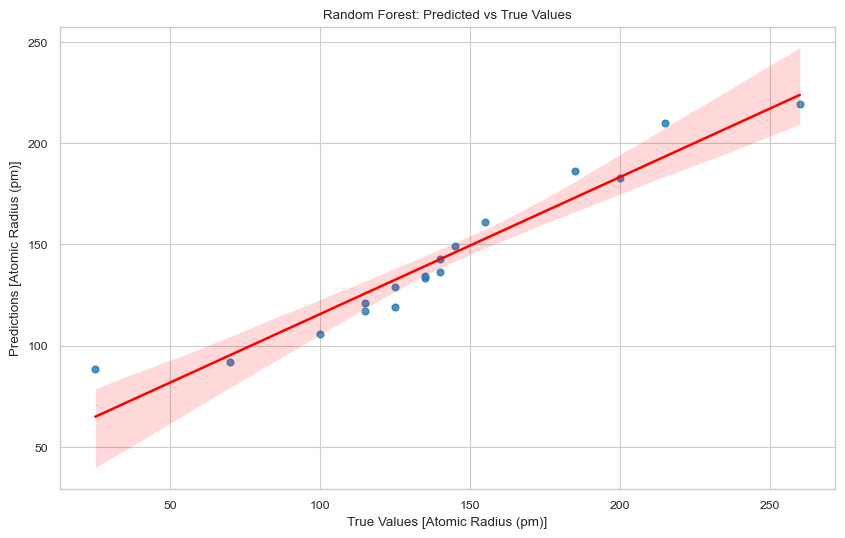

In [173]:
# Plot predicted vs true values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('True Values [Atomic Radius (pm)]')
plt.ylabel('Predictions [Atomic Radius (pm)]')
plt.title('Random Forest: Predicted vs True Values')
plt.show()

## XGBoost with 2 features and 1 target

In [174]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
# Extract features and target variable
X = df2[['Atomic Number', 'Electronegativity (Ghosh)']]
y = df2['Atomic Radius (pm)']

In [176]:
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [178]:
# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [179]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 403.8510
Root Mean Squared Error (RMSE): 20.0960
Mean Absolute Error (MAE): 14.1979
R^2 Score: 0.8551


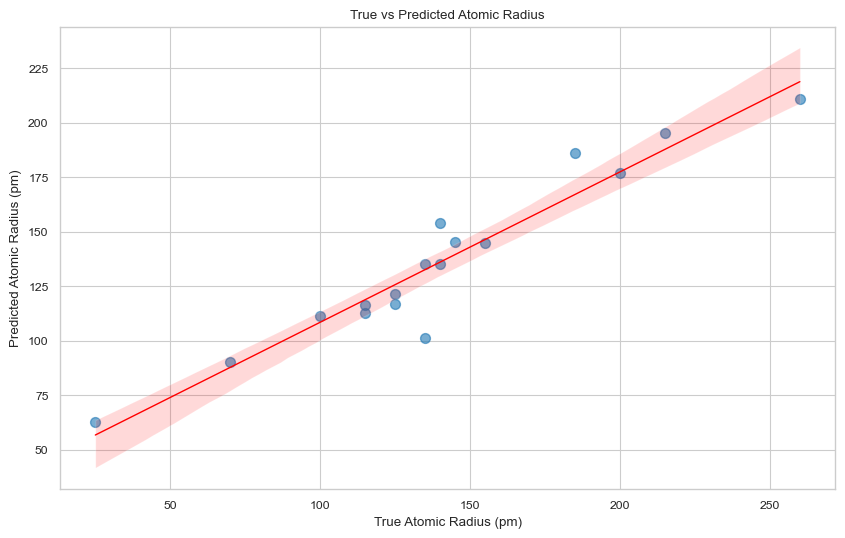

In [180]:
# Create a Seaborn regplot to visualize true vs predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red", "lw": 1}, scatter_kws={"s": 50, "alpha": 0.6})
plt.xlabel('True Atomic Radius (pm)')
plt.ylabel('Predicted Atomic Radius (pm)')
plt.title('True vs Predicted Atomic Radius')
plt.show()

## XGBoost with 3 features and 1 target

In [181]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
# Extract features and target variable
X = df2[['Atomic Number', 'Electronegativity (Ghosh)', 'Electronegativity (Pauling)']]
y = df2['Atomic Radius (pm)']

In [183]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [185]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 208.1780
Root Mean Squared Error (RMSE): 14.4284
Mean Absolute Error (MAE): 9.3183
R^2 Score: 0.9253


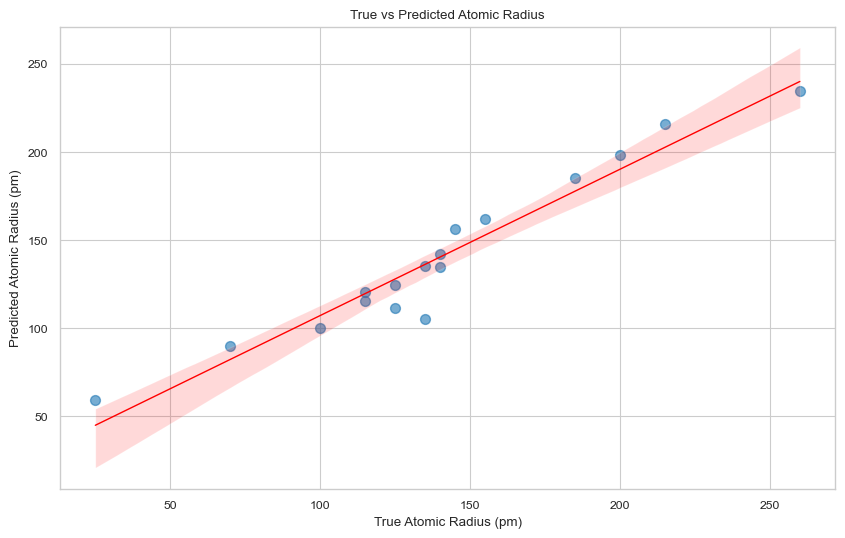

In [186]:
# Create a Seaborn regplot to visualize true vs predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red", "lw": 1}, scatter_kws={"s": 50, "alpha": 0.6})
plt.xlabel('True Atomic Radius (pm)')
plt.ylabel('Predicted Atomic Radius (pm)')
plt.title('True vs Predicted Atomic Radius')
plt.show()

In [187]:
# Create and display a DataFrame to compare the true and predicted atomic radius alongside the atomic numbers
comparison_df = pd.DataFrame({
    'Atomic Number': X_test['Atomic Number'],
    'True Atomic Radius (pm)': y_test,
    'Predicted Atomic Radius (pm)': y_pred
})

# Sort the DataFrame by atomic number for easier interpretation
comparison_df = comparison_df.sort_values('Atomic Number')

# Display the DataFrame
comparison_df

,Atomic Number,True Atomic Radius (pm),Predicted Atomic Radius (pm)
0,1,25.0,59.337662
5,6,70.0,89.709526
12,13,125.0,111.234772
14,15,100.0,99.875313
21,22,140.0,142.044815
25,26,140.0,134.769669
31,32,125.0,124.233131
33,34,115.0,115.188309
34,35,115.0,120.664024
37,38,200.0,197.890060


# Can we improve XGB with one Feature?

In [188]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import numpy as np

# Load the dataset from the uploaded file
df = pd.read_csv('periodic_table.csv')

# Filter out rows with missing values
df_filtered = df.dropna(subset=["Atomic Number", "Atomic Radius (pm)"])

# Prepare the features and target variable
X = df_filtered[["Atomic Number"]]
y = df_filtered["Atomic Radius (pm)"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost with the best parameters
best_params = {
    'subsample': 0.9,
    'reg_lambda': 1.5,
    'reg_alpha': 0.5,
    'n_estimators': 150,
    'max_depth': 3,
    'learning_rate': 0.3,
    'colsample_bytree': 1.0
}

best_xgb_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = best_xgb_model.predict(X_test)


c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\henri\anaconda3\envs\py310w\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [189]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 816.6170988540463
Root Mean Squared Error: 28.576513063249095
Mean Absolute Error: 16.355316162109375
R2 Score: 0.6273990423479636


In [190]:
# Create a DataFrame to compare true and predicted values
comparison_df = pd.DataFrame({'True_Values': y_test, 'Predictions': y_pred})

# Reset the index for better visualization
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison DataFrame
print(comparison_df.head(10))

   True_Values  Predictions
0        145.0   134.804535
1        135.0   140.021027
2        185.0   187.849976
3        145.0   136.395737
4         25.0   120.718170
5        135.0   135.675903
6        145.0   155.034607
7        175.0   174.914917
8        180.0   150.170761
9        140.0   158.623108


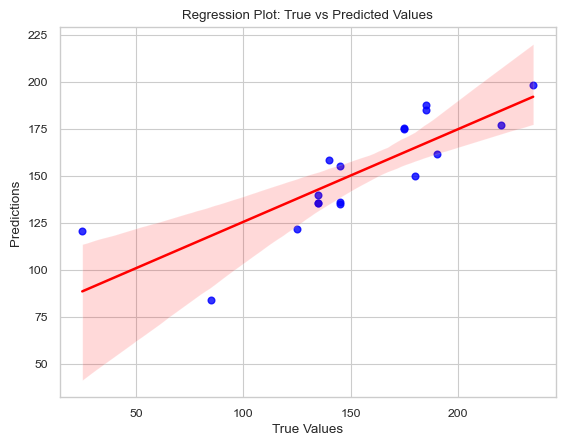

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the regression plot
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Plot: True vs Predicted Values')
plt.show()

---
---
# Metrics

| Metric | Formula  | Pros                                             | Cons                                             |
|--------|----------|--------------------------------------------------|--------------------------------------------------|
| MAE    | $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \|y_i - \hat{y}_i\| $ | - Simple to understand<br/>- Linear penalty for errors | - Less sensitive to outliers compared to RMSE/MSE, , Ignores error direction  |
| R2     | $ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $ | - Provides an overall measure of model fit<br/>- Commonly used and understood | - Can be misleading in non-linear settings<br/>- Can't compare across different datasets |
| RMSE   | $ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $ | - More sensitive to outliers than MAE<br/>- Punishes larger errors more severely  | - Can be affected significantly by outliers     |
| MSE    | $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ | - Continuously differentiable, useful for optimization<br/>- Punishes larger errors more than MAE  | - Not as interpretable as MAE or RMSE          |
| MSPE   | $ \text{MSPE} = \frac{1}{n} \sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{y_i}\right)^2 $ | - Weights errors based on the true value<br/>- Useful when relative errors are more important  | - Can be undefined or unstable if true values contain zeros |
| MSLE   | $ \text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \log(\hat{y}_i + 1))^2 $ | - Useful when predictions and true values have exponential growth<br/>- Less sensitive to outliers in the predicted values | - Requires positive true and predicted values<br/>- Can be less interpretable |

Note:
- $ n $ is the number of data points.
- $ y_i $ is the true value for the i-th data point.
- $ \hat{y}_i $ is the predicted value for the i-th data point.
- $ \bar{y} $ is the average of the true values.